# Newton and Quasi-Newton Methods

## Exercise 1: Newton's Method

In [16]:
import numpy as np



def Newton(Df, Hf, x0, maxiter=100, tol=1e-15):
    iter = 0
    epsi = 1 
    D = Df(x0)
    H = Hf(x0)
    converged = False
    while (epsi > tol) & (iter < maxiter):
        iter +=1
        
        z = np.linalg.solve(H, D.T)

        x = x0 - z

        x0 = x
        D = Df(x0)
        H = Hf(x0)
        
        epsi = np.linalg.norm(D, np.inf)

    
    if  epsi< tol:
        print("Converged!")
        converged = True
    
    return x, converged, iter



In [96]:
from scipy import optimize as opt
f = opt.rosen # The Rosenbrock function.
df = opt.rosen_der # The first derivative.
d2f = opt.rosen_hess # The second derivative (Hessian).
opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=50, retall=True)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


(array([1.00000021, 1.00000045]),
 [array([-2,  2]),
  array([-1.01994107,  2.24409936]),
  array([-0.562813  ,  0.73585826]),
  array([-0.36827151,  0.18693516]),
  array([-0.32503271,  0.07231728]),
  array([-0.33815082,  0.10876181]),
  array([-0.33155626,  0.10065382]),
  array([-0.32008543,  0.0897776 ]),
  array([-0.29877807,  0.07223382]),
  array([-0.25810869,  0.04233263]),
  array([-0.18144513, -0.00617483]),
  array([-0.14828669, -0.01469884]),
  array([-0.10811225, -0.0128942 ]),
  array([ 0.01400379, -0.02662741]),
  array([0.12683461, 0.00832816]),
  array([0.18664968, 0.01372847]),
  array([0.25626686, 0.04271876]),
  array([0.34183051, 0.10297075]),
  array([0.45408563, 0.18528138]),
  array([0.54024058, 0.29449385]),
  array([0.59937917, 0.35059563]),
  array([0.64518344, 0.40214864]),
  array([0.69724825, 0.47211744]),
  array([0.7542323 , 0.56407697]),
  array([0.84367453, 0.69626482]),
  array([0.84669487, 0.71027411]),
  array([0.89923655, 0.80564747]),
  array([0.

In [22]:
Newton(df, d2f, [-2,2])

Converged!


(array([1., 1.]), True, 6)

## Exercise 2: BFGS

In [74]:
import numpy as np



def BFGS(Df, x0, maxiter=100, tol=1e-15):
    iter = 0
    epsi = 1 
    D = Df(x0)
    A0 = np.eye(len(x0),len(x0))
    converged = False
    while (epsi > tol) & (iter < maxiter):
        iter +=1

        x = x0 - A0 @ D.T
        print(x)
        
        s = x - x0
        print("S is", s)
        y = Df(x).T - Df(x0).T
        print("Y is", y)
#         if s

        STY = s.T @ y
        if STY == 0:
            print("Dividing by zero!")
            break
        
        print("St y",STY)
        bloc1 = (STY + y.T * A0 * y) * ( s * s.T ) / ( STY )**2
        bloc2 = (A0 * y * s.T + s * y.T * A0)/ ( STY )
        A = A0 + bloc1 - bloc2
        A0 = A
        

        x0 = x
        D = Df(x0)

        
        epsi = np.linalg.norm(D, np.inf)

    
    if  epsi< tol:
        print("Converged!")
        converged = True
    
    return x, converged, iter



In [75]:
BFGS(df,[-2,2])

[1604.  402.]
S is [1606.  400.]
Y is [ 1.65046083e+12 -5.14482400e+08]
St y 2650434295542472.0
[-9.95230193e+03  5.14561493e+08]
S is [-1.15563019e+04  5.14561091e+08]
Y is [1.65247459e+15 8.36171187e+10]
St y 2.3929620579170345e+19
[-9.56965048e+08 -5.33421111e+10]
S is [-9.56955095e+08 -5.38566726e+10]
Y is [-3.50548606e+29 -1.83156431e+20]
St y 3.3545928442871096e+38
[2.02656353e+18 1.18687457e+20]
S is [2.02656353e+18 1.18687457e+20]
Y is [ 3.32920594e+57 -8.21391950e+38]
St y 6.746847352326344e+75
[9.08842217e+36 5.32271355e+38]
S is [9.08842217e+36 5.32271355e+38]
Y is [ 3.00279351e+113 -1.65198835e+076]
St y 2.729065514765434e+150
[1.82786885e+74 1.07050730e+76]
S is [1.82786885e+74 1.07050730e+76]
Y is [ 2.44284035e+225 -6.68220905e+150]
St y 4.465191779553804e+299
[nan nan]
S is [nan nan]
Y is [nan nan]
St y nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


(array([nan, nan]), False, 7)

### Exercise 3

In [ ]:
import time
def comparison(N):
    x0 = np.random.uniform(low = -3, high = 3, size=(N,N))
    speed1 = []
    iter1 = []
    speed2 = []
    iter2 = []
    speed3 = []
    iter3 = []
    for i in range(N)
        x = x0[i,i]
        start = time.time()
        iter1.append(Newton(df, d2f, x)[2])
        end = time.time() - start
        speed1.append(end)

        start = time.time()
        iter2.append(BFGS(df, x)[2])
        end = time.time() - start
        speed2.append(end)

        start = time.time()
        opt.fmin_bfgs(f=f, x0=x, fprime=df, maxiter=50, disp=False, retall = True)
        iter3.append()
        end = time.time()
        speed3.append(end)
        
    plt.scatter(speed1, iter1)
    plt.scatter(speed2, iter2)
    plt.scatter(speed3, iter3)
    plt.legend(['Newton', 'BFGS', 'opt.fmin_bfgs'])
    plt.show()


## Exercise 4: Gauss-Newton Method

In [137]:
from matplotlib import pyplot as plt


def gauss_newton(r, jac, x0, maxiter=100000, tol=1e-15):
    iter = 0
    epsi = 1 

    JJ = lambda x: jac(x).T @ jac(x)
    J = jac(x0)
    converged = False
    while (epsi > tol) & (iter < maxiter):
        iter += 1

        z = np.linalg.solve(JJ(x0), J.T @ r(x0))

        x = x0 - z
        epsi = np.linalg.norm(x-x0, 2)
        print("Error is", epsi)
        #Update
        x0 = x
        J = jac(x0)

        
    
    if  epsi< tol:
        print("Converged!")
        converged = True
        
    result = [x, iter, converged]
    return result


In [138]:
import numpy as np
from matplotlib import pyplot as plt
# Generate random data for t = 0, 1, ..., 10.
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10) # Perturbed data.
# Define the model function and the residual (based on the data).
model = lambda x, t: x[0]*np.sin(x[1]*t) # phi(x,t)
residual = lambda x: model(x, T) - y # r(x) = phi(x,t) - y
# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.sin(x[1]*T, x[0]*T*np.cos(x[1]*T))))

In [139]:
x0 = np.array([2.5,.6])
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))
gauss_newton(residual, jac, x0)

Error is 0.19547691188815758
Error is 0.4196304330885485
Error is 0.0005939638349948274
Error is 7.654137987334641e-05
Error is 2.2542696714923755e-06
Error is 8.349815863349683e-08
Error is 3.0632483162103156e-09
Error is 1.1241821554097212e-10
Error is 4.125421380131389e-12
Error is 1.5104583229974664e-13
Error is 5.236911533344271e-15
Error is 4.440892098500626e-16
Converged!


[array([2.74758897, 0.50471225]), 12, True]

In [140]:
opt.leastsq(func=residual, x0=np.array([2.5,.6]), Dfun=jac)

(array([2.74758889, 0.50471228]), 1)

## Exercise 5: Application of non-linear least square

In [145]:
from scipy.optimize import leastsq
import pandas as pd

data = np.load('population.npy')
data

array([[  0.   ,   3.929],
       [  1.   ,   5.308],
       [  2.   ,   7.24 ],
       [  3.   ,   9.638],
       [  4.   ,  12.866],
       [  5.   ,  17.069],
       [  6.   ,  23.192],
       [  7.   ,  31.443],
       [  8.   ,  38.558],
       [  9.   ,  50.156],
       [ 10.   ,  62.948],
       [ 11.   ,  75.996],
       [ 12.   ,  91.972],
       [ 13.   , 105.711],
       [ 14.   , 122.775],
       [ 15.   , 131.669]])

In [164]:
time = pd.date_range('1790', periods= 16, freq = '10Y' )

dataset = pd.DataFrame(data[:,1], index = time)
# dataset.plot()
# # plt.plot(time, data[:,1])
# # plt.show()

x0 = np.array([1.5, .4, 2.5])
model1 = lambda x, t: x[0]*np.exp(x[1]*(t + x[2]))
T = data[:,0]
y = data[:,1]
residual = lambda x: model1(x, T) - y

# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.exp(x[1]*(T + x[2])), \
                                 (T + x[2])*x[0]*np.exp(x[1]*(T + x[2])), \
                                x[1]*x[0]*np.exp(x[1]*(T + x[2]))))
                                
                                
X = leastsq(func=residual, x0=x0, Dfun=jac)[0]

print(X)



[1.67729595 0.18474177 9.11885064]


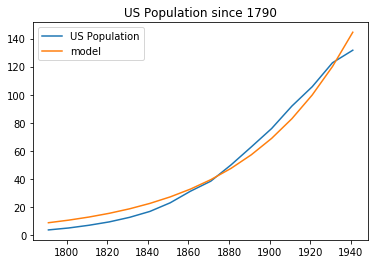

In [165]:
yhat = model1(X,T)
plt.plot(time, data[:,1])
plt.plot(time, yhat)
plt.legend(['US Population', 'model'])
plt.title('US Population since 1790')
plt.show()

In [171]:
#Different model

x0 = np.array([150, .4, -15])
model = lambda x, t: x[0]/(1 + np.exp(-x[1]*(t + x[2])))
T = data[:,0]
y = data[:,1]
residual = lambda x: model(x, T) - y

# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((1/(1 + np.exp(-x[1]*(T + x[2]))), \
                                 x[0]*(T + x[2])*(1 + np.exp(-x[1]*(T + x[2])))**(-2), \
                                 x[0]*x[1]*(1 + np.exp(-x[1]*(T + x[2])))**(-2)))
                                
                                
X = leastsq(func=residual, x0=x0, Dfun=jac)[0]
print(X)

[175.92019886   0.33629982 -11.72522672]


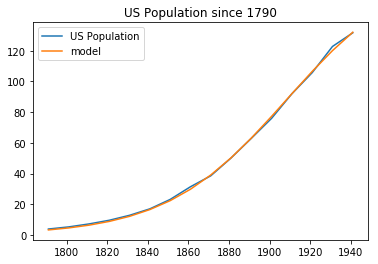

In [172]:
yhat = model(X,T)
plt.plot(time, data[:,1])
plt.plot(time, yhat)
plt.legend(['US Population', 'model'])
plt.title('US Population since 1790')
plt.show()